# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

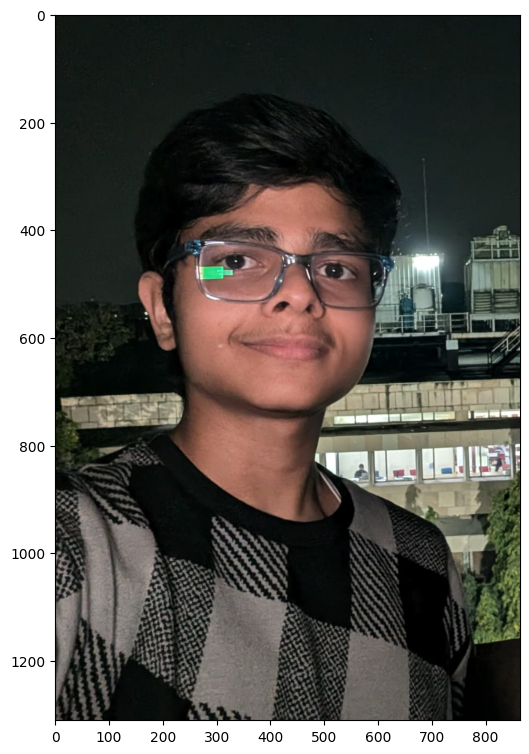

In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bgr = cv2.imread("Ashmil_image.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #converting BGR to RGB
plt.figure(figsize = (6,12))
plt.imshow(img_rgb)
plt.show()

In [2]:
img_rgb_float = img_rgb.astype(np.float32)
R = img_rgb_float[:, :, 0]
G = img_rgb_float[:, :, 1]
B = img_rgb_float[:, :, 2]

gray_manual = 0.299 * R + 0.587 * G + 0.114 * B
gray_manual = gray_manual.astype(np.uint8)

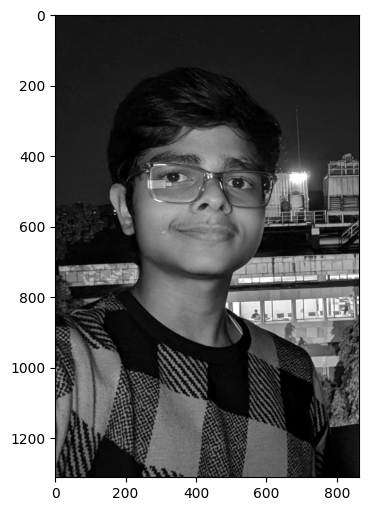

In [3]:
gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (6,6))
plt.imshow(gray_cv, cmap = 'gray')
plt.show()

In [4]:
print("RGB shape:", img_rgb.shape)
print("gray shape:", gray_cv.shape)

RGB shape: (1311, 864, 3)
gray shape: (1311, 864)


In [5]:
print(img_rgb[3, 10], img_rgb[30,48])
print(gray_cv[110, 20], gray_cv[50,93])

[22 27 23] [17 26 21]
22 21


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [6]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

gray_float = gray_cv.astype(np.float32) #converting to float for maths

f = np.fft.fft2(gray_float) #FFT
fshift  = np.fft.fftshift(f) #shifting low frequencies to centre
print(fshift)

[[-192.78972 -416.103j     -533.37714  -28.55815j
    10.945512+312.40775j   ...  103.22727 -120.803314j
   403.46255  -86.60171j     10.201409  -5.5685806j]
 [-190.19868 +173.98323j   -264.18414 +271.60437j
   306.12546  +86.9847j    ... -333.1504  +359.4531j
   119.828224+493.63577j    161.35768 -124.740166j ]
 [-108.3364   +41.973827j   216.92343 -112.12452j
   454.2544  +152.12398j   ...   59.859707-179.07184j
   -63.251507+162.27383j    183.8661  -324.1115j   ]
 ...
 [-108.3364   -41.973827j   183.8661  +324.1115j
   -63.251507-162.27383j   ...  -30.976902+169.56125j
   454.2544  -152.12398j    216.92343 +112.12452j  ]
 [-190.19868 -173.98323j    161.35768 +124.740166j
   119.828224-493.63577j   ... -635.0061  -232.53113j
   306.12546  -86.9847j    -264.18414 -271.60437j  ]
 [-192.78972 +416.103j       10.201409  +5.5685806j
   403.46255  +86.60171j   ...  313.84088 -222.3046j
    10.945512-312.40775j   -533.37714  +28.55815j  ]]


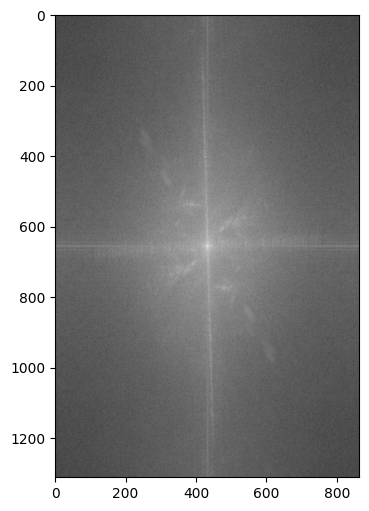

In [7]:
magnitude = 20*np.log(np.abs(fshift) + 1)

phase = np.angle(fshift)

plt.figure(figsize = (6,6))
plt.imshow(magnitude, cmap = "gray")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

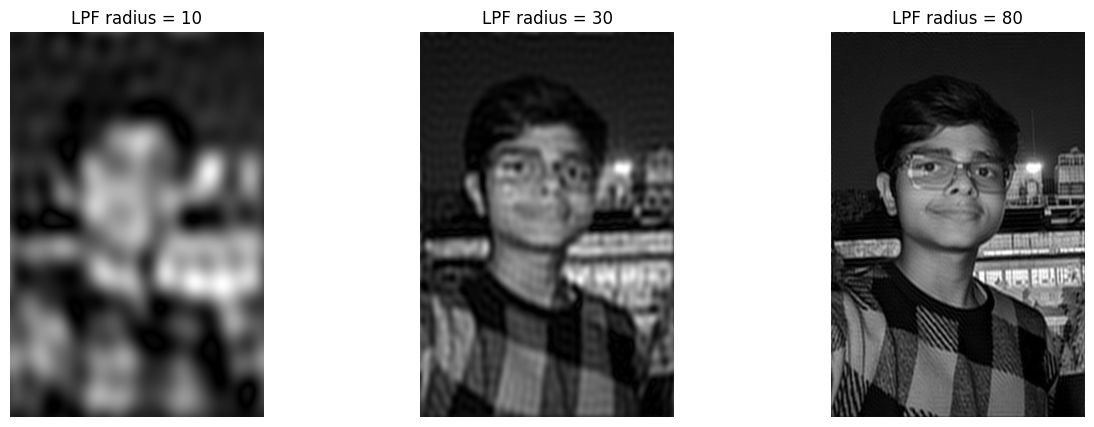

In [8]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

rows, cols = gray_cv.shape
crow, ccol = rows//2,cols//2

radii = [10, 30, 80]
lpf_results = []

for r in radii:
    # 1. create a zero mask
    mask = np.zeros((rows, cols), np.uint8)

    # 2. draw white filled circle at center
    # this keeps only low frequencies inside radius r
    cv2.circle(mask, (ccol, crow), r, 1, -1)

    # 3. apply mask in frequency domain
    f_lpf = fshift * mask

    # 4. inverse shift
    f_ishift = np.fft.ifftshift(f_lpf)

    # 5. inverse FFT to go back to spatial domain
    img_back = np.fft.ifft2(f_ishift)

    # 6. take magnitude (since result is complex)
    img_lpf = np.abs(img_back)

    # 7. normalize/convert to uint8 for display
    img_lpf = np.clip(img_lpf, 0, 255).astype(np.uint8)

    lpf_results.append(img_lpf)

# Show results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, r in enumerate(radii):
    axs[i].imshow(lpf_results[i], cmap="gray")
    axs[i].set_title(f"LPF radius = {r}")
    axs[i].axis("off")
plt.show()

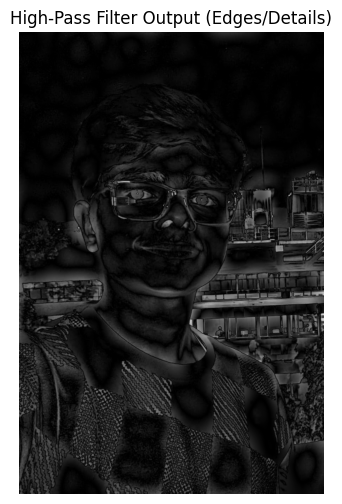

In [9]:
r = 10

# Low-pass mask
mask_lpf = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf, (ccol, crow), r, 1, -1)

# High-pass mask = 1 - low-pass
mask_hpf = 1 - mask_lpf

# Apply HPF
f_hpf = fshift * mask_hpf

# Inverse shift + IFFT
f_ishift_hpf = np.fft.ifftshift(f_hpf)
img_back_hpf = np.fft.ifft2(f_ishift_hpf)
img_hpf = np.abs(img_back_hpf)
img_hpf = np.clip(img_hpf, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_hpf, cmap="gray")
plt.title("High-Pass Filter Output (Edges/Details)")
plt.axis("off")
plt.show()


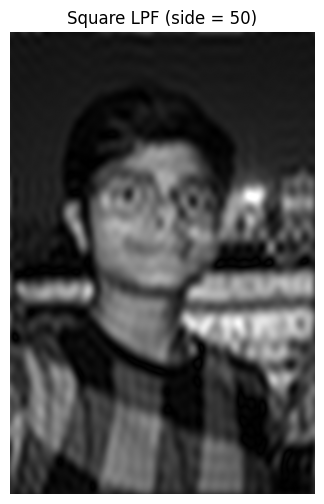

In [10]:
side = 50
half = side // 2

mask_square = np.zeros((rows, cols), np.uint8)

# make a centered square of ones (LPF region)
mask_square[crow-half : crow+half, ccol-half : ccol+half] = 1

# apply square LPF
f_square = fshift * mask_square

f_ishift_sq = np.fft.ifftshift(f_square)
img_back_sq = np.fft.ifft2(f_ishift_sq)
img_sq_lpf = np.abs(img_back_sq)
img_sq_lpf = np.clip(img_sq_lpf, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_sq_lpf, cmap="gray")
plt.title("Square LPF (side = 50)")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

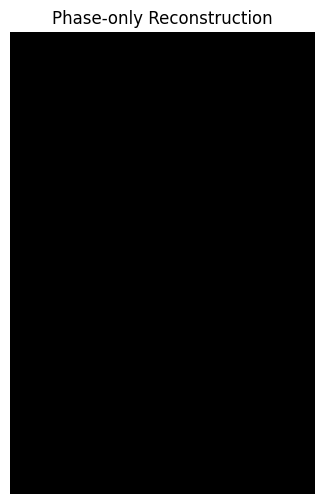

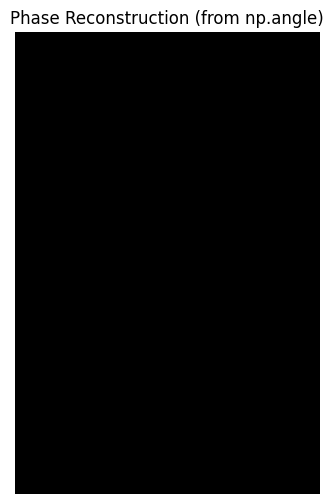

In [11]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
mag = np.abs(fshift)

phase_only = fshift / mag

# Inverse shift + inverse FFT
phase_only_ishift = np.fft.ifftshift(phase_only)
img_phase_only_complex = np.fft.ifft2(phase_only_ishift)
img_phase_only = np.abs(img_phase_only_complex)

# Normalize to 0–255 for display
img_phase_only = np.clip(img_phase_only, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_phase_only, cmap="gray")
plt.title("Phase-only Reconstruction")
plt.axis("off")
plt.show()

#using np.angle(fshift)
# This alone is just angles, not a valid spectrum
phase = np.angle(fshift)
phase_ishift = np.fft.ifftshift(phase)
img_phase_from_angle = np.fft.ifft2(phase_ishift)
img_phase_from_angle = np.abs(img_phase_from_angle)
img_phase_from_angle = np.clip(img_phase_from_angle, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_phase_from_angle, cmap="gray")
plt.title("Phase Reconstruction (from np.angle)")
plt.axis("off")
plt.show()


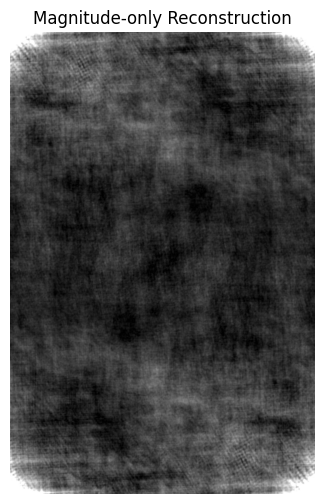

In [14]:
mag_only = np.abs(fshift)

# Make it complex with zero phase (imag part = 0)
mag_only_complex = mag_only.astype(np.complex64)

mag_ishift = np.fft.ifftshift(mag_only_complex)
img_mag_only_complex = np.fft.ifft2(mag_ishift)
img_mag_only = np.abs(img_mag_only_complex)

# Normalize/clip to 0–255
img_mag_only = np.clip(img_mag_only, 0, 255).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_mag_only, cmap="gray")
plt.title("Magnitude-only Reconstruction")
plt.axis("off")
plt.show()

# The image from magnitude-only reconstruction looks very different from the "Magnitude Spectrum".
# The Magnitude Spectrum plot shows |F(u,v)| directly in the FREQUENCY domain, and we take log(|F|+1)
# to compress the huge dynamic range so that we can see both large and small values.
# In magnitude-only reconstruction, we perform an inverse FFT on |F| (with zero phase),
# so we are back in the SPATIAL domain, and we are no longer using the logarithm.
# Therefore the visualization and contrast look completely different.


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

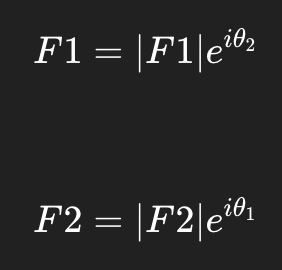

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [13]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.